In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)

from scipy import stats

$$X \sim N(\mu_1=0, \sigma^2=1), Y \sim N(\mu_2=2, \sigma^2=1), \rho=0.2$$

In [2]:
# レポートの問題設定
mu_x, mu_y = 0.0, 2.0
sigma_x, sigma_y = 1.0, 1.0
rho = 0.2

<Figure size 640x480 with 0 Axes>

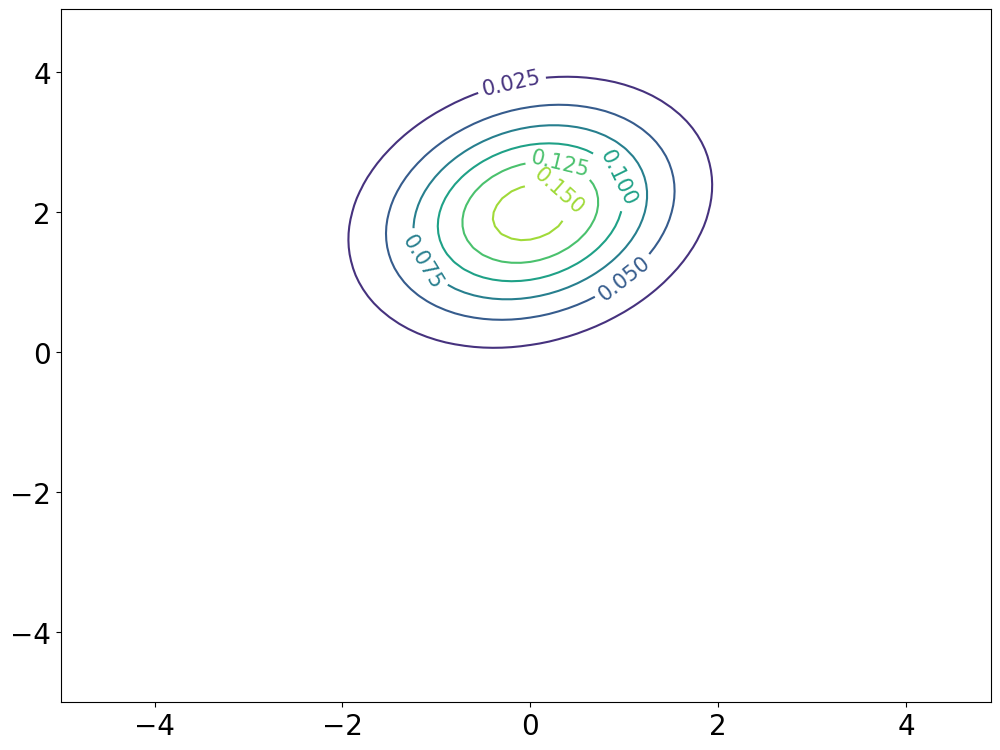

<Figure size 640x480 with 0 Axes>

In [3]:
# 平均
mus = np.array([mu_x, mu_y])
# 分散共分散行列
sigmas = np.array([[sigma_x**2, rho*sigma_x*sigma_y],
                   [rho*sigma_x*sigma_y, sigma_y**2]])

x = np.arange(-5.0, 5.0, 0.1)
y = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = stats.multivariate_normal.pdf(pos, mean=mus, cov=sigmas)

fig, ax = plt.subplots(figsize=(12, 9))
cntr = ax.contour(X, Y, Z)
ax.clabel(cntr, fontsize=15)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.figure()

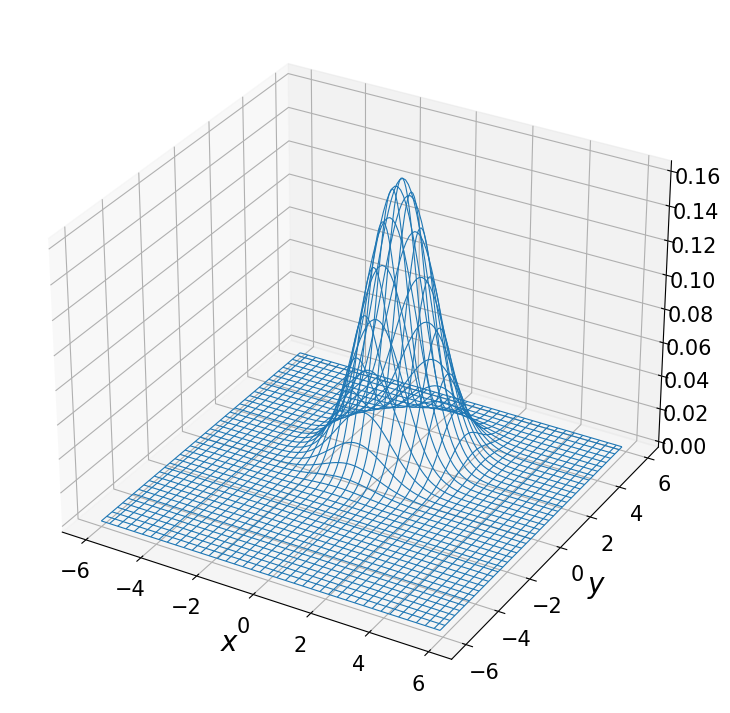

In [4]:
x = np.arange(-6.0, 6.0, 0.1)
y = np.arange(-6.0, 6.0, 0.1)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = stats.multivariate_normal.pdf(pos, mean=mus, cov=sigmas)

fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection' : '3d'})
surface = ax.plot_wireframe(X, Y, Z,  linewidth=0.8)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='z', labelsize=15)
plt.show()

In [5]:
# p(x|y)
def px_cond_y(y):
    px_mean = mu_x + rho*(sigma_x/sigma_y)*(y-mu_y)
    px_scale = sigma_x*np.sqrt(1-rho**2)
    return np.random.normal(loc=px_mean, scale=px_scale)

# p(y|x)
def py_cond_x(x):
    py_mean = mu_y + rho*(sigma_y/sigma_x)*(x-mu_x)
    py_scale = sigma_y*np.sqrt(1-rho**2)
    return np.random.normal(loc=py_mean, scale=py_scale)

In [6]:
def gibbs_sampling(steps=10000, y_init=0):
    samples = []
    y = y_init
    for i in range(steps):
        x = px_cond_y(y)
        samples.append([x, y])
        y = py_cond_x(x)
        samples.append([x, y])

    return np.array(samples)

In [7]:
# ギブスサンプリングの実行
samples = gibbs_sampling(steps=10000)

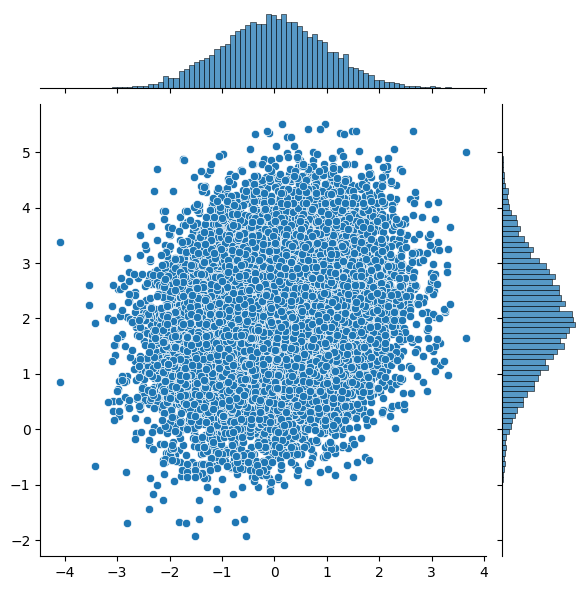

In [8]:
x, y = samples[:, 0], samples[:, 1]
sns.jointplot(x=x, y=y, kind='scatter')

<ipython-input-9-5407ebf2128e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm_x, ax=x_axis, hist=False)
<ipython-input-9-5407ebf2128e>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_y, ax=y_axis, hist=False, vertical=True)


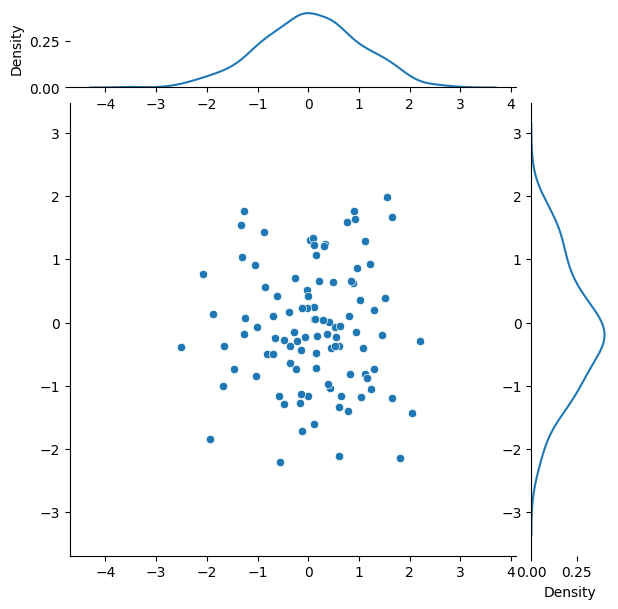

In [9]:
from scipy.stats import norm
# データを生成
data_x = np.random.randn(100)
data_y = np.random.randn(100)

# jointplotを作成
jplot = sns.jointplot(x=data_x, y=data_y, kind='scatter',)

# X軸のヒストグラムに正規分布をプロット
norm_x = np.random.normal(loc=0, scale=1, size=1000)
norm_y = np.random.normal(loc=2, scale=1, size=1000)
x_axis = jplot.ax_marg_x
x_axis.clear()
sns.distplot(norm_x, ax=x_axis, hist=False)

# Y軸のヒストグラムに正規分布をプロット
y_axis = jplot.ax_marg_y
y_axis.clear()
sns.distplot(data_y, ax=y_axis, hist=False, vertical=True)

plt.show()

<ipython-input-10-1f045e978fcf>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_axis, pdf, 'k', linewidth=2, label="N(0, 1)", color="red")


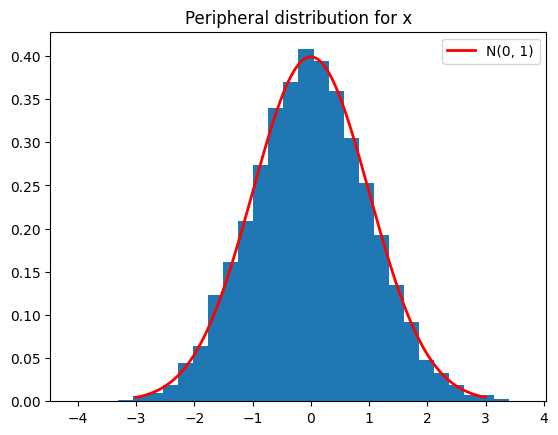

In [10]:
x_axis = np.arange(-3, 3, 0.01)
plt.hist(x, bins=30, density=True)
pdf = norm.pdf(x_axis, 0, 1)
plt.plot(x_axis, pdf, 'k', linewidth=2, label="N(0, 1)", color="red")
plt.title("Peripheral distribution for x")
plt.legend()
plt.show()

<ipython-input-11-46fea7c2d19a>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(y_axis, pdf, 'k', linewidth=2, label="N(2, 1)", color="red")


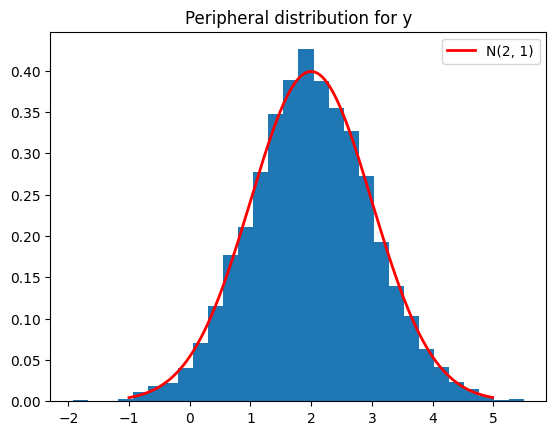

In [11]:
y_axis = np.arange(-1, 5, 0.01)
plt.hist(y, bins=30, density=True)
pdf = norm.pdf(y_axis, 2, 1)
plt.plot(y_axis, pdf, 'k', linewidth=2, label="N(2, 1)", color="red")
plt.title("Peripheral distribution for y")
plt.legend()
plt.show()